# load libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle

# load dataset

In [2]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1WEsFJXmaLMR1lnVgc_O_COT3OxHIqKck


Downloading...
From: https://drive.google.com/uc?id=1WEsFJXmaLMR1lnVgc_O_COT3OxHIqKck
To: /content/BankChurners.csv
100% 1.51M/1.51M [00:00<00:00, 14.3MB/s]


# 1.1

In [8]:
#extract feature names

file_path = '/content/BankChurners.csv'
df = pd.read_csv(file_path)

feature_names = df.columns.tolist()
print("Feature names:", feature_names)

#sample size

sample_size = len(df)
print("Sample size:", sample_size)

Feature names: ['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
Sample size: 10127


# 1.2

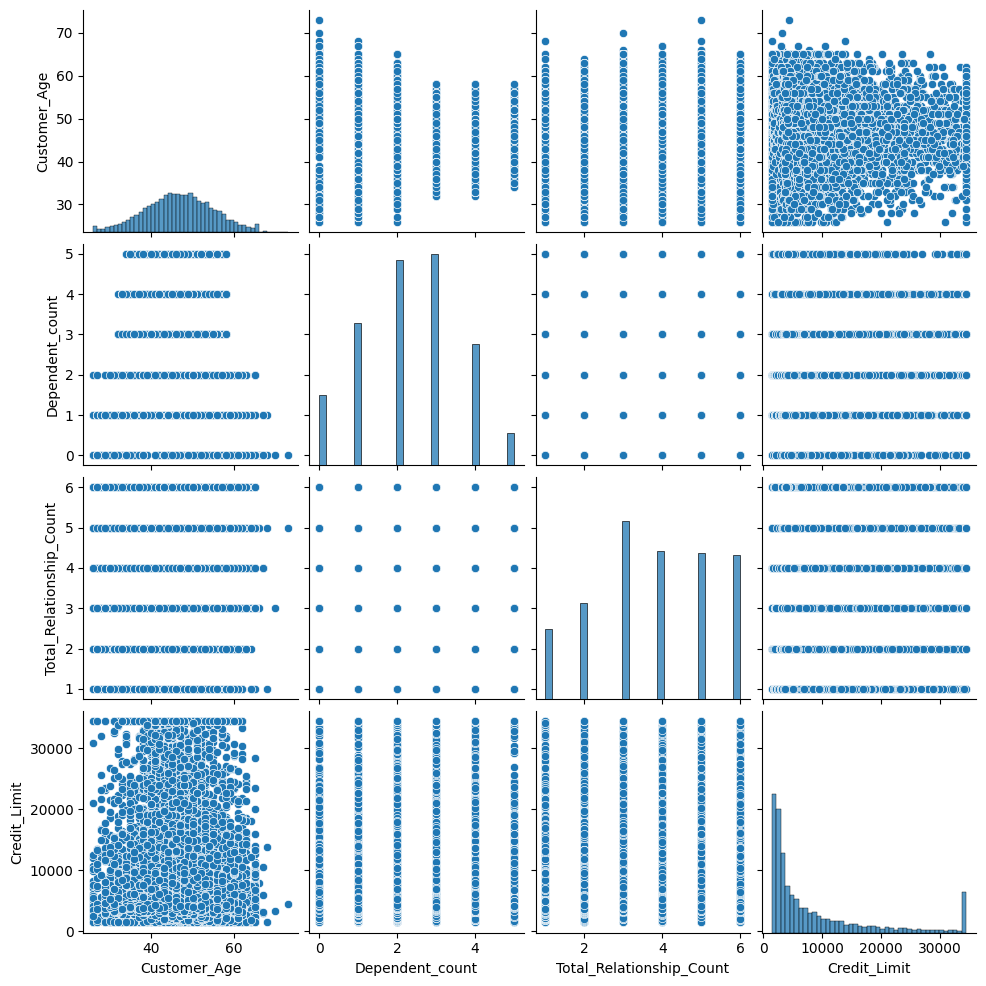

In [4]:
selected_features = ['Customer_Age', 'Dependent_count', 'Total_Relationship_Count', 'Credit_Limit']

sns.pairplot(df[selected_features])
plt.show()

# 1.3

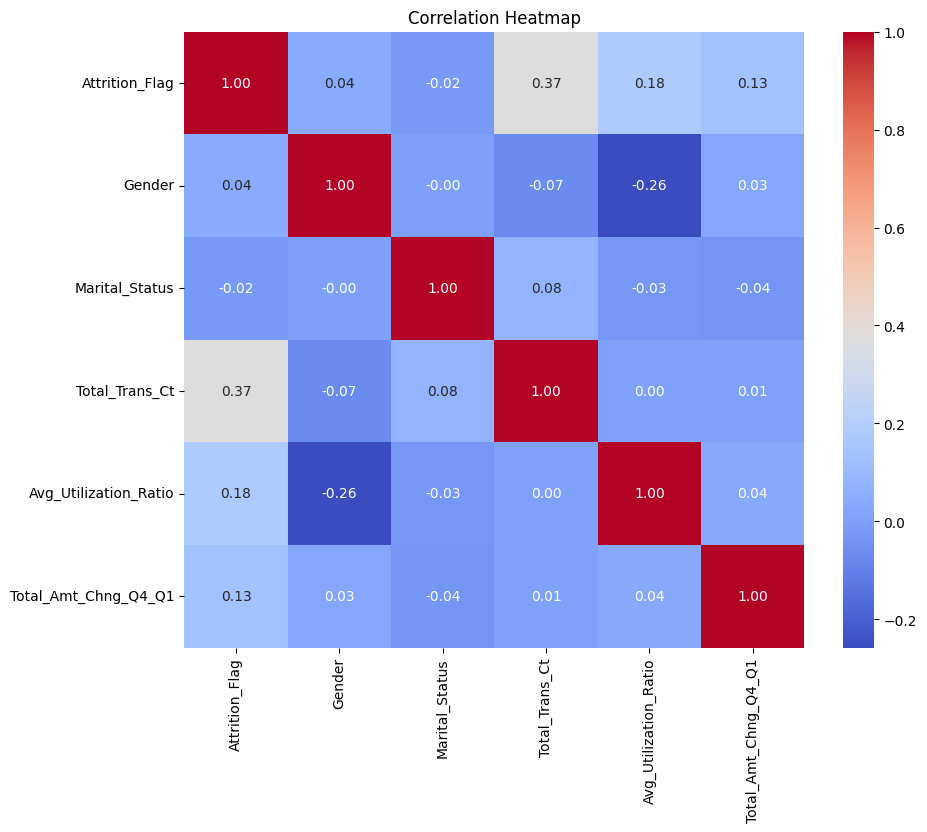

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,1,45,1,3,High School,1,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,1,49,0,5,Graduate,2,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,1,51,1,3,Graduate,1,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,1,40,0,4,High School,3,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,1,40,1,3,Uneducated,1,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
categorical_features = ['Attrition_Flag', 'Gender', 'Marital_Status']
continuous_features = ['Total_Trans_Ct', 'Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1']

# Check if the categorical columns exist in the DataFrame
for col in categorical_features:

        df[col] = df[col].astype('category').cat.codes

# Combine categorical and continuous features
selected_features = categorical_features + continuous_features

# Compute the correlation matrix
correlation_matrix = df[selected_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Heatmap")
plt.show()
df.head()

# 1.4

In [9]:
# Show the number of null values in each column
null_counts = df.isnull().sum()
print("Number of null values in each column:")
print(null_counts)
# Remove rows with null values
df = df.dropna()

# Reset the index after removing rows
df = df.reset_index(drop=True)


Number of null values in each column:
CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Cat

# 1.5

In [10]:
# Extract unique class names
classes = df['Attrition_Flag'].unique()
print("Classes in 'Attrition Flag':", classes)


Classes in 'Attrition Flag': ['Existing Customer' 'Attrited Customer']


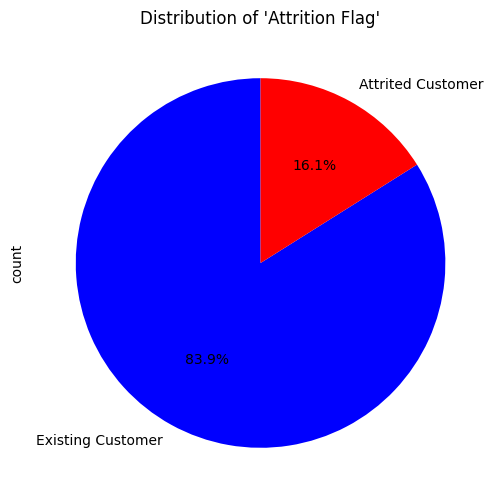

In [11]:
#class distribution
class_counts = df['Attrition_Flag'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
class_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
plt.title("Distribution of 'Attrition Flag'")
plt.show()


# 1.6

## Split data into X and y / Label Encoding / Identify columns


In [12]:
#Drop the first column (Client Number)
df = df.drop(columns=[df.columns[0]])

#Split data into X and y
X = df.drop(columns=['Attrition_Flag'])
y = df['Attrition_Flag']

#Label Encoding
le = LabelEncoder()
y = le.fit_transform(y)  # Convert categorical target variable to numeric

# Identify numerical and categorical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

In [ ]:

print(df.head())


   Attrition_Flag  Customer_Age  Gender  Dependent_count Education_Level  \
0               1            45       1                3     High School   
1               1            49       0                5        Graduate   
2               1            51       1                3        Graduate   
3               1            40       0                4     High School   
4               1            40       1                3      Uneducated   

   Marital_Status Income_Category Card_Category  Months_on_book  \
0               1     $60K - $80K          Blue              39   
1               2  Less than $40K          Blue              44   
2               1    $80K - $120K          Blue              36   
3               3  Less than $40K          Blue              34   
4               1     $60K - $80K          Blue              21   

   Total_Relationship_Count  ...  Credit_Limit  Total_Revolving_Bal  \
0                         5  ...       12691.0                  777  

## Split data into training, validation, and testing

In [13]:
# Split data into training, validation, and testing (60%, 20%, 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=43, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=43, stratify=y_temp)

print(f"Training data: {X_train.shape}, Validation data: {X_val.shape}, Test data: {X_test.shape}")

Training data: (6076, 21), Validation data: (2025, 21), Test data: (2026, 21)


## Train the Model

### 1. train without balancing the data

Training data: (6076, 21), Validation data: (2025, 21), Test data: (2026, 21)

--- Training Evaluation ---

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       976
           1       1.00      1.00      1.00      5100

    accuracy                           1.00      6076
   macro avg       1.00      1.00      1.00      6076
weighted avg       1.00      1.00      1.00      6076


Confusion Matrix:


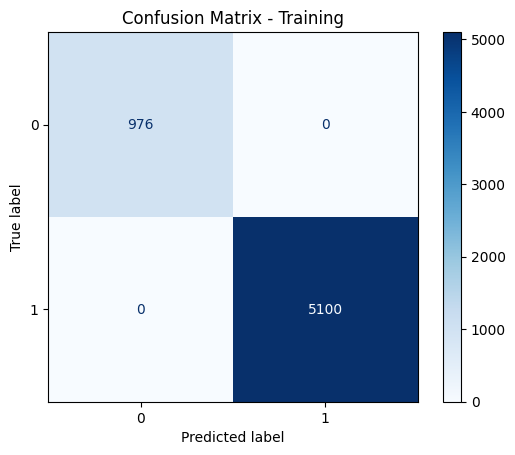


--- Validation Evaluation ---

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       325
           1       1.00      1.00      1.00      1700

    accuracy                           1.00      2025
   macro avg       1.00      1.00      1.00      2025
weighted avg       1.00      1.00      1.00      2025


Confusion Matrix:


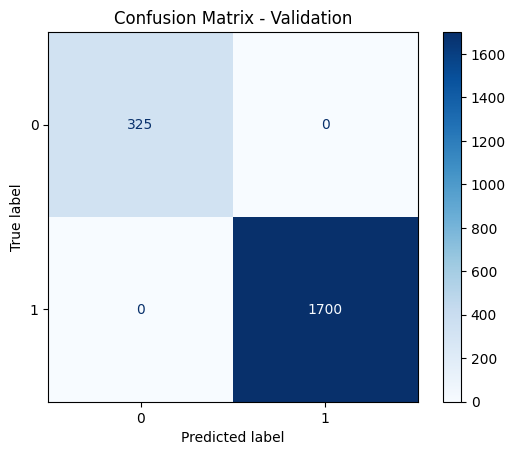


--- Testing Evaluation ---

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       326
           1       1.00      1.00      1.00      1700

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026


Confusion Matrix:


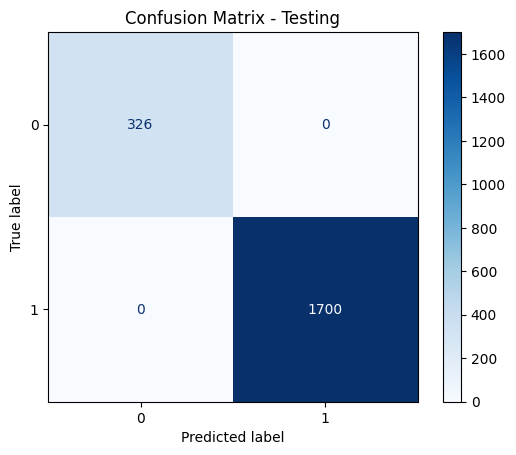

In [ ]:
# Preprocessing for numerical data (standardization) and categorical data (label encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),     # Standardize numerical features
        ('cat', OrdinalEncoder(), categorical_columns)    # Label encode categorical features
    ])

print(f"Training data: {X_train.shape}, Validation data: {X_val.shape}, Test data: {X_test.shape}")
# Create a pipeline with preprocessing and classification
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=43))
])

# Train the model
model.fit(X_train, y_train)

# Function to evaluate and display metrics
def evaluate_model(stage, X, y_true, model):
    print(f"\n--- {stage} Evaluation ---")

    # Predict
    y_pred = model.predict(X)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    # Confusion Matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {stage}")
    plt.show()

# Evaluate on training data
evaluate_model("Training", X_train, y_train, model)

# Evaluate on validation data
evaluate_model("Validation", X_val, y_val, model)

# Evaluate on testing data
evaluate_model("Testing", X_test, y_test, model)

### 2. train with balanced data

Original Training Data Shape: (6076, 21), (6076,)
Balanced and Shuffled Training Data Shape: (10200, 21), (10200,)

--- Training Evaluation ---

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       976
           1       1.00      1.00      1.00      5100

    accuracy                           1.00      6076
   macro avg       1.00      1.00      1.00      6076
weighted avg       1.00      1.00      1.00      6076


Confusion Matrix:


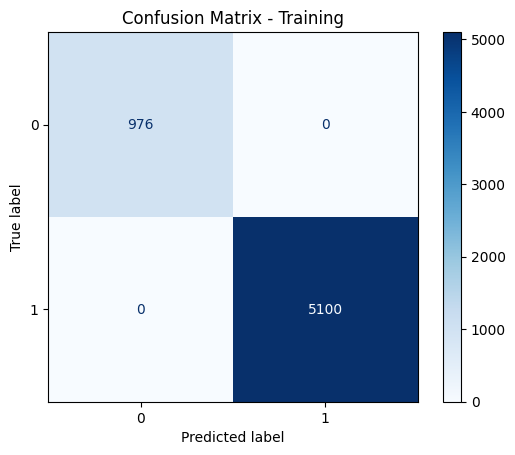


--- Validation Evaluation ---

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       325
           1       1.00      1.00      1.00      1700

    accuracy                           1.00      2025
   macro avg       1.00      1.00      1.00      2025
weighted avg       1.00      1.00      1.00      2025


Confusion Matrix:


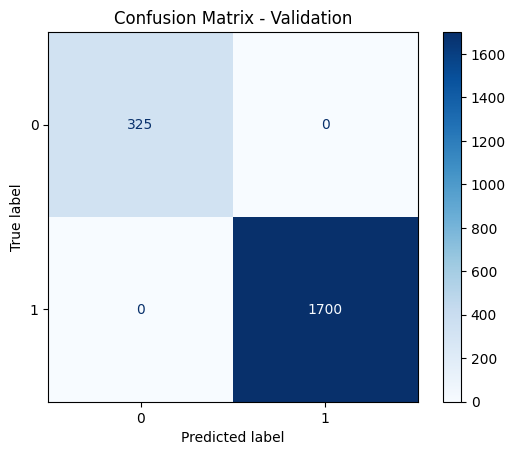


--- Testing Evaluation ---

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       326
           1       1.00      1.00      1.00      1700

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026


Confusion Matrix:


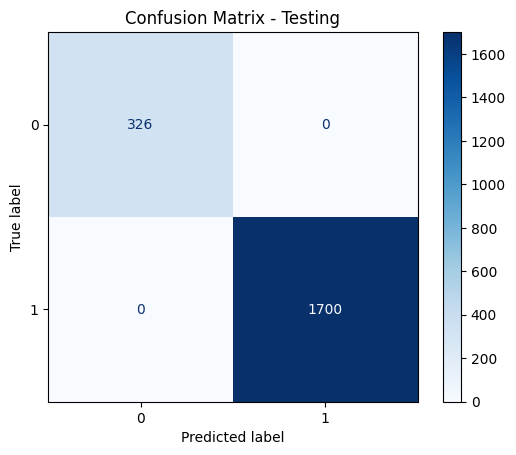

In [14]:
# Preprocessing for numerical data (standardization) and categorical data (label encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),     # Standardize numerical features
        ('cat', OrdinalEncoder(), categorical_columns)    # Label encode categorical features
    ])

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=43)
X_train_balanced, y_train_balanced = smote.fit_resample(preprocessor.fit_transform(X_train), y_train)

# Shuffle the balanced data
X_train_balanced, y_train_balanced = shuffle(X_train_balanced, y_train_balanced, random_state=42)

print(f"Original Training Data Shape: {X_train.shape}, {y_train.shape}")
print(f"Balanced and Shuffled Training Data Shape: {X_train_balanced.shape}, {y_train_balanced.shape}")

# Create the model
model = RandomForestClassifier(random_state=43)
model.fit(X_train_balanced, y_train_balanced)

# evaluate metrics
def evaluate_model(stage, X, y_true, model, preprocessor=None):
    print(f"\n--- {stage} Evaluation ---")

    # Preprocess the data
    if preprocessor is not None:
        X = preprocessor.transform(X)

    # Predict
    y_pred = model.predict(X)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    # Confusion Matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {stage}")
    plt.show()

# Evaluate on training data
evaluate_model("Training", X_train, y_train, model, preprocessor)

# Evaluate on validation data
evaluate_model("Validation", X_val, y_val, model, preprocessor)

# Evaluate on testing data
evaluate_model("Testing", X_test, y_test, model, preprocessor)